In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Reading the data

In [2]:
data = pd.read_csv('data/reviews.csv')

## Counts of rows and columns

In [3]:
data.shape

(11431, 2)

## Checking for nans/nulls

In [4]:
data.isna().sum()

text      1
label    10
dtype: int64

In [5]:
data[data['label'].isna()]

,text,label
872,We visited this nice place during the festive ...,NaN
873,It is quite large in terms of space and the am...,NaN
874,We had some prawn starter and in main course w...,NaN
875,Well we should admit that they really make one...,NaN
876,To be very honest I am not a chinese food love...,NaN
3544,I had only Biryani from this place.Coming stra...,NaN
3545,•I don't know about the hygiene factor.,NaN
3546,•The biryani was over-oily yet very dry.,NaN
3547,•Price is pocket friendly.,NaN
3548,•Quantity is sufficient.,NaN


In [6]:
data[data['text'].isna()]

,text,label
7370,NaN,1.0


## Bidding them good bye

In [7]:
data = data.dropna().reset_index(drop=True)

In [8]:
data.shape

(11420, 2)

## Analysing article lenghts

In [9]:
data['text'].apply(len).describe()

count    11420.000000
mean       362.695972
std        212.100970
min          1.000000
25%        199.000000
50%        304.000000
75%        483.000000
max       1066.000000
Name: text, dtype: float64

## Because a picture is worth a 1000 words

(-50, 1200)

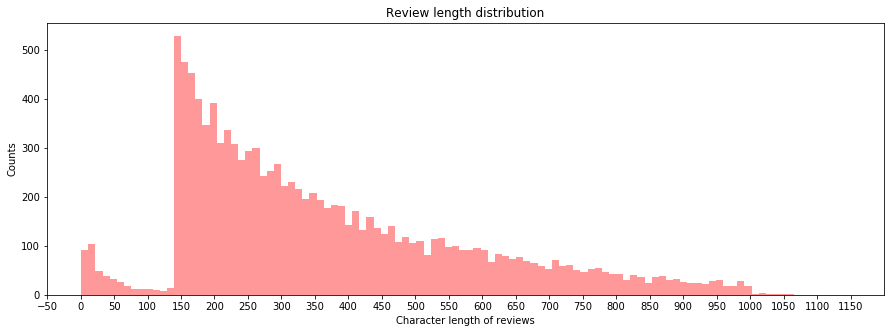

In [10]:
text_lens = data['text'].apply(len).values
fig = plt.figure()
fig.set_size_inches(15, 5)
g = sns.distplot(text_lens, kde=False, bins=100, color='red')
g.set_xlabel('Character length of reviews')
g.set_ylabel('Counts')
g.set_xticks(np.arange(-50, 1200, 50))
g.set_title('Review length distribution')
g.set_xlim(-50, 1200)

## Manually checking out the smaller articles ...

In [11]:
(text_lens <= 2).sum()

6

In [12]:
data[text_lens <= 2]['text']

3620      v
7141     ok
9655     😚😚
10132    ok
10606     3
10966     k
Name: text, dtype: object

## ... and the longer ones

In [13]:
(text_lens > 1000).sum()

10

In [14]:
data[text_lens > 1000]['text']

2317     #25thDecember\n\n#ChristmasDiaries\n\nI had he...
4917     Initially I was skeptical about this place. Ma...
5814     What happens when someone tries to give a fun ...
6208     This is a pretty new restaurant and I've been ...
6223     One of the classiest place to chill out on a l...
6875     Keeping the review crisp and short, since ther...
9704     This place used to be our go to takeaway when ...
10411    Pao Chein was once a very popular family joint...
11176    A regular dinner from this pocket friendly dha...
11290    Nu Wan Li is an authentic Chinese restaurant o...
Name: text, dtype: object

## Dropping the smaller articles

In [15]:
data = data[text_lens > 2].reset_index(drop=True)

## Now the ratings

In [16]:
label_counts = Counter(data['label'].values)
label_counts.most_common()

[(4.0, 4388),
 (5.0, 2788),
 (3.0, 2451),
 (1.0, 694),
 (2.0, 626),
 (3.5, 226),
 (4.5, 150),
 (2.5, 69),
 (1.5, 22)]

## Major class imbalance noticed, but let's talk in %

In [17]:
label_counts = {k: (v/data.shape[0])*100 for k, v in label_counts.items()}

In [18]:
label_counts

{5.0: 24.426143332749255,
 4.5: 1.3141755738566674,
 4.0: 38.444016120553705,
 2.0: 5.484492728228491,
 3.0: 21.473628876817944,
 1.0: 6.080252321710181,
 3.5: 1.9800245312773788,
 1.5: 0.19274575083231119,
 2.5: 0.604520763974067}

## Displying some of the examples from the _'ambiguous'_ class

In [19]:
data[data['label'] == 3]['text'].values[0]

"Well had been to this place a while back to attend an event. Really loved the banquet space on offer. The open area is a real show stopper. The food is good here. The starters on offer are pretty innovative and tasty. Really enjoyed the mini pizzas and fried chicken ala Kiev though it wasn't really the dish. Simply fried chicken with a tangy dip anyhow does the trick. The Dal makhni tart was innovate. However the Dal makes the casings soft and kills the fun. Food is decent here. Liked the chicken mughlai dish on offer. Need to work on their fish dishes.they use basa which is a tastless fish basically. needs stronger flavours to tingle the palate."

In [20]:
data[data['label'] == 3]['text'].values[10]

'Ordered 3 biriyani taste was good.\nBut quantity was not enough for one people.\nDelivery was fast.\nI got the order within 15min.\n\nThey should increase their quantity.'

In [21]:
data[data['label'] == 3]['text'].values[-1]

'Little expensive, ambience is good. \nTaste is not great! \nService is fine. \nChutney is stale, dosa tastes better. \nI thought rasgulla would taste good but this is the worst rasgulla I’ve ever tasted.'

In [22]:
data[data['label'] == 4]['text'].values[0]

'The best one till date existing amongst all the buffets in kolkata.has been there almost 4-5times.the live grill session is not an unknown thing to Calcuttans.i would like to emphasis about the Greek festival which was on.\nFood was great,the live Malpoa session could have been a bit better.'

In [23]:
data[data['label'] == 4]['text'].values[20]

'It has been a wonderful Sunday lunch at this joint. Above all, Aliah Restaurant is celebrating Biryani festival at Kolkata and being a Bong, how can i missed that chance to not celebrating this awesome auspicious festival of Biryani.\nNow something about the food,\nThey made such a delightful Biryani at this festival too. But all were not available, but they serve quite range of them.\nIt was a pleasure to being there. They serve Tikka Biryani, Hyderabadi Biryani, kachhi biryani, special chicken biryani.\nAll of were having an awesome essence of aroma of there genre.\nWith all I request aliah restaurant to celebrate this festival again'

In [24]:
data[data['label'] == 4]['text'].values[-1]

'I have always been a fan of the egg roll served here..I have eaten the double egg chicken roll a multiple time and ut is totally awesome..I have also eaten mutton biriyani from here..It was also very good...😊😊😊'

## Converting the labels to _'positive'_ and _'negative'_ binary labels

In [26]:
def label_map(lbl: float) -> str:
    if lbl >= 4:
        return 'positive'
    else:
        return 'negative'

In [27]:
data['class'] = data['label'].apply(label_map)

In [28]:
label_counts = Counter(data['class'].values)
label_counts.most_common()

[('positive', 7326), ('negative', 4088)]

In [29]:
data.head()

,text,label,class
0,A class service!\nFood was as always delicious...,5.0,positive
1,What more to say about a place that we keep on...,4.5,positive
2,Absolutely loved this place. They deserve ever...,5.0,positive
3,When I hear buffet this name pops up in my bra...,5.0,positive
4,Probably the most famed restaurant in town. Lo...,5.0,positive


In [30]:
data.shape

(11414, 3)

In [31]:
data.drop('label', axis=1, inplace=True)

## Spltting the data into train, validation and test sets

In [32]:
# 80% for train
train = data.sample(frac=0.8)
data.drop(train.index, axis=0, inplace=True)

# 10% for validation
valid = data.sample(frac=0.5)
data.drop(valid.index, axis=0, inplace=True)

# 10% for test
test = data

In [33]:
train.shape

(9131, 2)

In [34]:
train.head()

,text,class
3106,"I ordered a biryani, and the taste of the Biry...",positive
1927,A nice place to hangout since it has both the ...,positive
5405,This place is awesome for having lunch or dinn...,positive
7426,I got shell of egg in the egg roll. as a resul...,negative
1669,"Their biryani is oily, with a bit disconcertin...",negative


In [35]:
valid.shape

(1142, 2)

In [36]:
valid.head()

,text,class
5373,The food was excellent with surplus quantity. ...,positive
7754,This place nearer to the Gitanjali metro stati...,positive
11134,Ordered for Aloo tikki with choley just now @0...,negative
365,Hatari is one of those restaurants that our fa...,positive
8021,Disappointing.......\nThey have altered the ta...,negative


In [37]:
test.shape

(1141, 2)

In [38]:
test.head()

,text,class
24,This place is amazing. I think the best place ...,positive
25,This place has been on my list for quite some ...,positive
37,What a wonderful cold winter evening it was. M...,positive
49,BabBQ had always been a personal favorite when...,positive
60,Know for its Deep Dish Pizza this place is sur...,negative


## Finally, saving to disk

In [39]:
train.to_csv('data/train.csv')
valid.to_csv('data/valid.csv')
test.to_csv('data/test.csv')